<a href="https://colab.research.google.com/github/ZeroOFBright/XOR-Classification-using-MLP/blob/main/AI_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch import sigmoid
from torch.optim import lr_scheduler
import copy
import matplotlib.pyplot as plt



**สร้าง Dataframe สำหรับ ใช้ Train**

In [ ]:
data = {"x1":[0,0,1,1],"x2":[0,1,0,1],"result":[0,1,1,0]}
df = pd.DataFrame(data)
df

,x1,x2,result
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


**สร้าง Training Set**

In [ ]:
train_data = []
for i in range(len(df)):

  train_data.append( [ np.array( df.loc[i,["x1","x2"]] )  , np.array( df.loc[i,"result"]) ] )

dataloader = DataLoader(train_data)

for i, batch in enumerate(dataloader):
    print(i, batch)

0 [tensor([[0, 0]]), tensor([0])]
1 [tensor([[0, 1]]), tensor([1])]
2 [tensor([[1, 0]]), tensor([1])]
3 [tensor([[1, 1]]), tensor([0])]


**สร้าง MLP สำหรับเทรน**

In [ ]:
class XOR_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(2,2)    #input layer= 2 , hidden layer size = 2 , output layer = 1
    self.linear2 = nn.Linear(2,1)

  def forward(self,x):
    x = sigmoid(self.linear1(x))  #(0,1)     #  -> 0    1
    x = self.linear2(x)
    return x 


In [ ]:
model = XOR_Model()
model

XOR_Model(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
device = torch.device ("cuda:0" if torch.cuda.is_available() else "cpu" )
device

model = model.to(device)

**Optimizer = SGD , Criterion = MSELOSS**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)  
criterion = nn.MSELoss()


In [ ]:
def plot_weight_graph(model,labels):
  model_params = list(model.parameters())

  X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
  Y = torch.Tensor([0,1,1,0]).view(-1,1)

  plt.figure(figsize=(10,5))

  model_weights = model_params[0].cpu().data.numpy()
  model_bias = model_params[1].cpu().data.numpy()

  plt.scatter(X.numpy()[[0,1,2,-1], 0]  , X.numpy()[[0,1,2,-1], 1], c=labels ,s=50)


  x_1 = np.arange(-0.1, 1.1, 0.1)
  y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
  plt.plot(x_1, y_1)

  x_2 = np.arange(-0.1, 1.1, 0.1)
  y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])

  plt.plot(x_2, y_2)
  plt.legend(["neuron_1", "neuron_2"], loc=8)
  plt.title("  purple = 0 , yellow = 1  ")

  plt.show()

In [ ]:
train_loss = []
def train_model(model,optimizer,num_epoch=25):

  for epoch in range(1,num_epoch+1):

    running_loss = 0.0
    accuracy = 0.0
    list_label = []

    for inputs,labels in dataloader:
      
      inputs = inputs.to(device) 
      labels = labels.to(device) 

      optimizer.zero_grad() # initialize by 0 gradient

      outputs = model(torch.tensor(inputs,dtype=torch.float))
      outputs = outputs[0] 

      #print(outputs.shape)
      #print(labels)
      
      output_estimate = (outputs >= 0.5).float()       
      accuracy += (output_estimate == labels).float()     # calculate accuracy
      list_label.append(output_estimate)

      loss = criterion(outputs, labels.to(torch.float))

      loss.backward()
      optimizer.step()  #back propogation

      running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / 4  
    epoch_acc = accuracy / 4 


    train_loss.append(epoch_loss)

    if epoch % 100 == 0 :
        print("epoch {} Loss: {:.4f}".format(epoch,epoch_loss) ) 
        print("epoch {} Accuracy: {:} ".format(epoch,float(epoch_acc)) ) 
        plot_weight_graph(model,list_label)


  return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 100 Loss: 0.2584
epoch 100 Accuracy: 0.25 


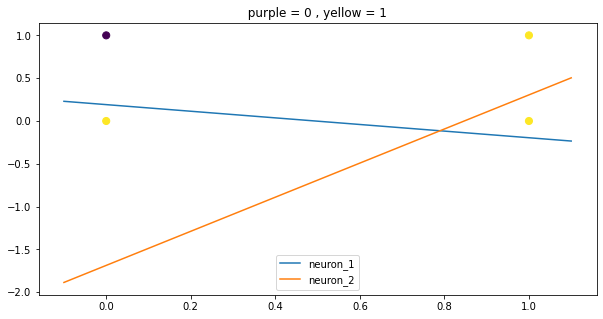

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 200 Loss: 0.2582
epoch 200 Accuracy: 0.25 


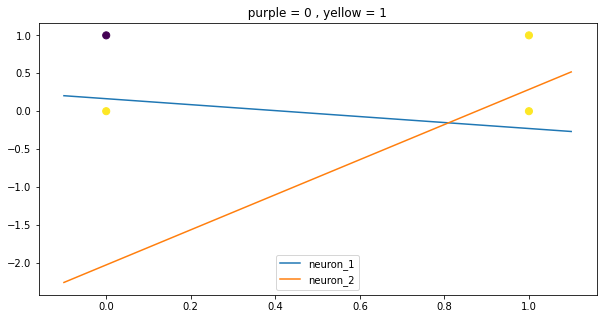

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 300 Loss: 0.2580
epoch 300 Accuracy: 0.25 


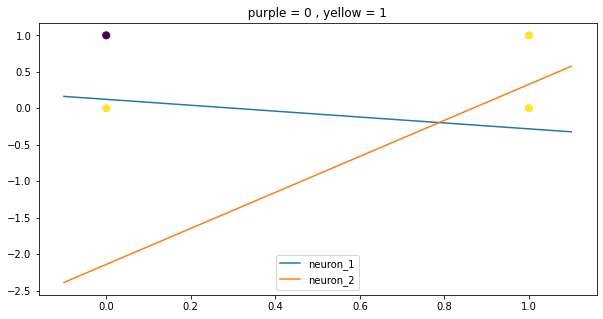

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 400 Loss: 0.2578
epoch 400 Accuracy: 0.5 


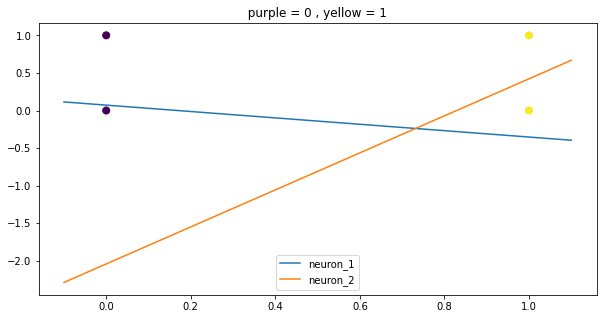

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 500 Loss: 0.2577
epoch 500 Accuracy: 0.25 


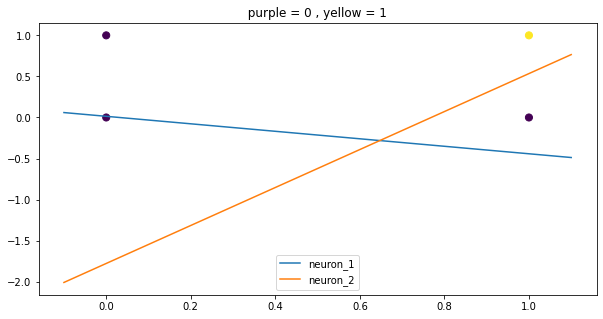

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 600 Loss: 0.2575
epoch 600 Accuracy: 0.25 


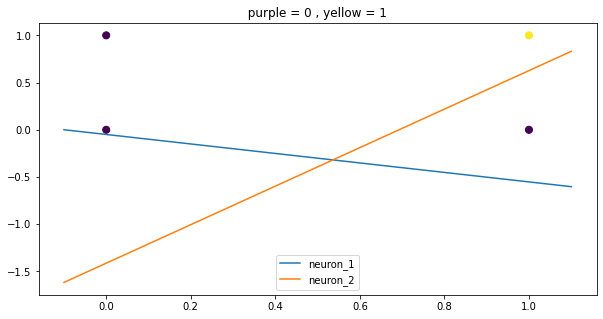

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 700 Loss: 0.2571
epoch 700 Accuracy: 0.25 


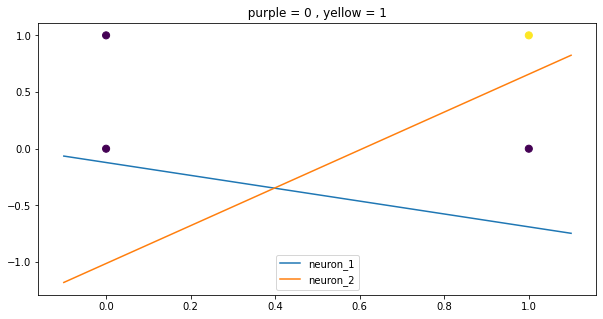

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 800 Loss: 0.2564
epoch 800 Accuracy: 0.25 


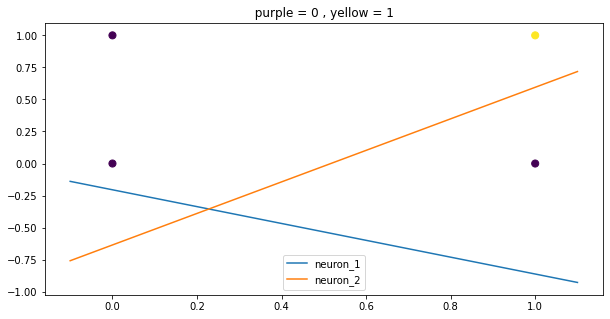

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 900 Loss: 0.2543
epoch 900 Accuracy: 0.25 


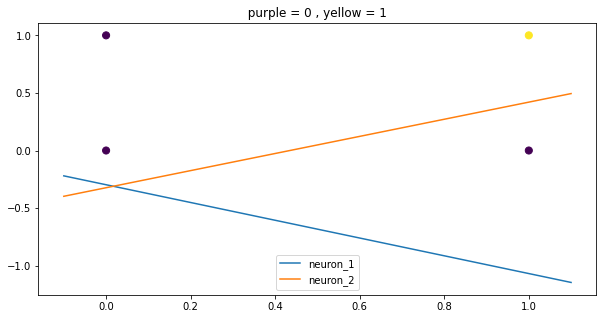

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1000 Loss: 0.2470
epoch 1000 Accuracy: 0.75 


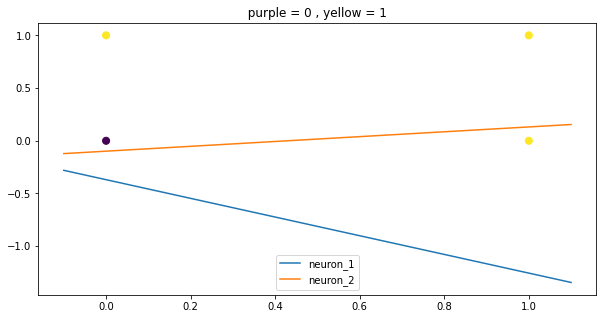

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1100 Loss: 0.2258
epoch 1100 Accuracy: 0.75 


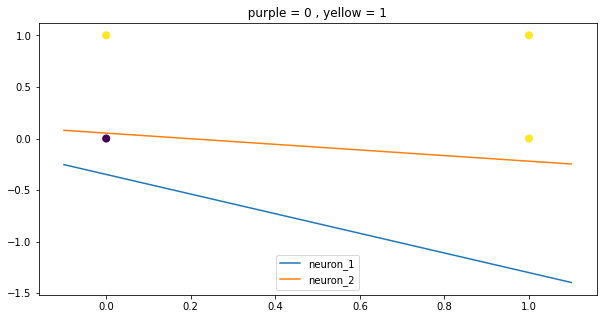

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1200 Loss: 0.1867
epoch 1200 Accuracy: 0.75 


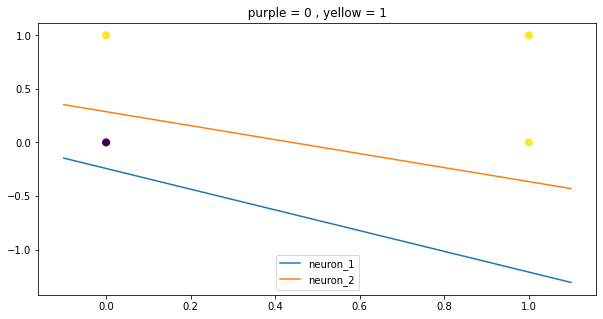

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1300 Loss: 0.1097
epoch 1300 Accuracy: 1.0 


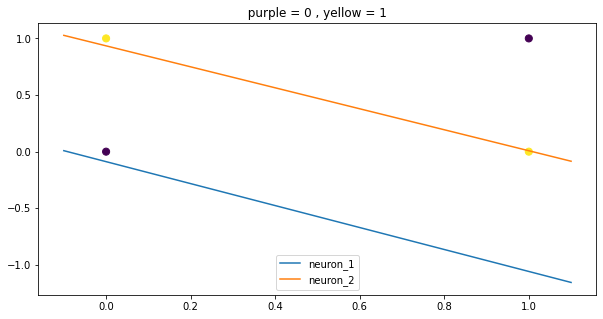

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1400 Loss: 0.0149
epoch 1400 Accuracy: 1.0 


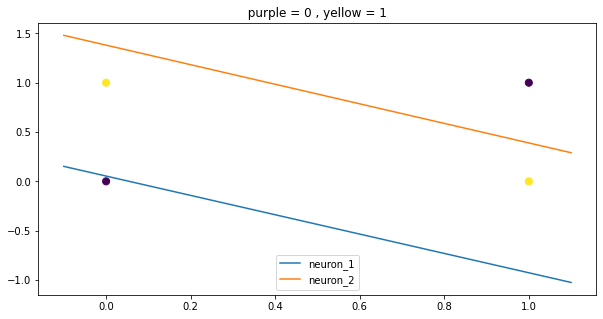

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1500 Loss: 0.0003
epoch 1500 Accuracy: 1.0 


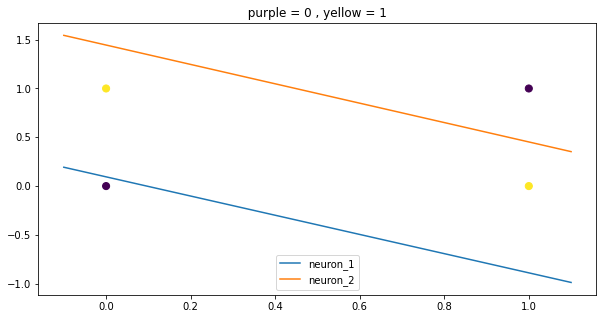

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1600 Loss: 0.0000
epoch 1600 Accuracy: 1.0 


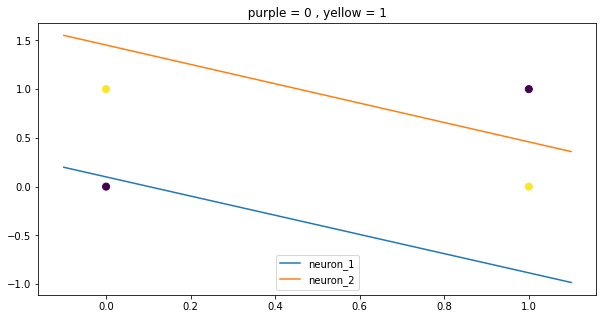

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1700 Loss: 0.0000
epoch 1700 Accuracy: 1.0 


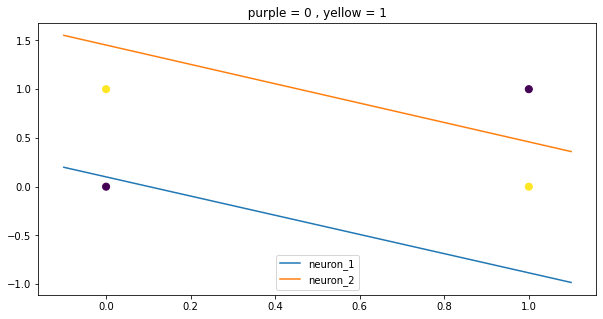

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1800 Loss: 0.0000
epoch 1800 Accuracy: 1.0 


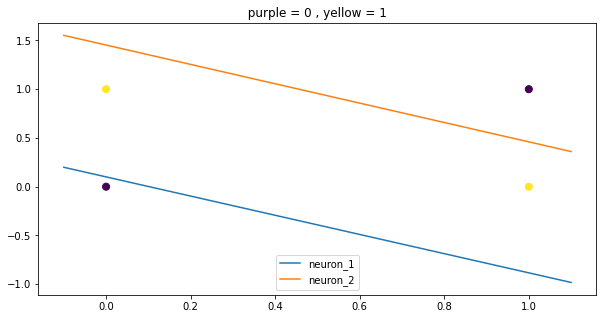

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 1900 Loss: 0.0000
epoch 1900 Accuracy: 1.0 


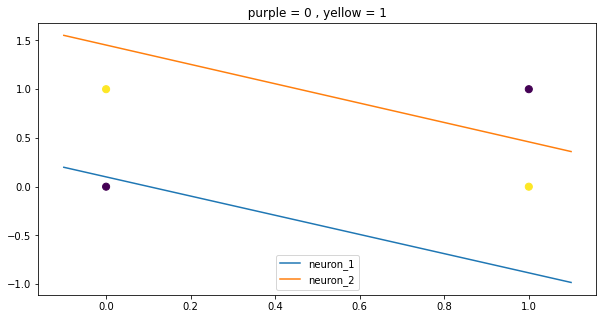

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 2000 Loss: 0.0000
epoch 2000 Accuracy: 1.0 


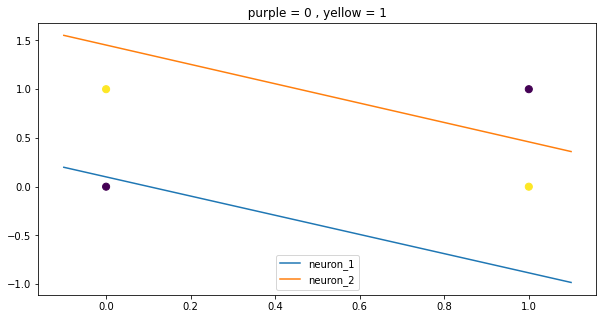

In [ ]:
model = train_model(model,optimizer,2000)

**กราฟ Lossในแต่ละ Epoch**

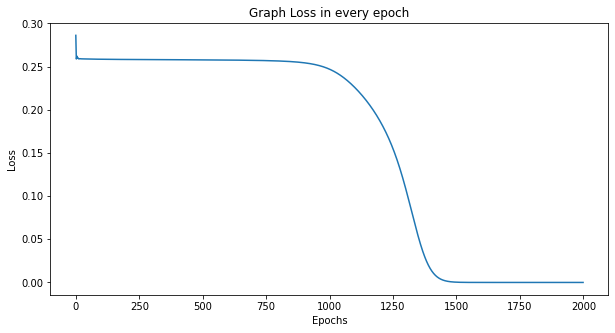

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Graph Loss in every epoch")
plt.plot(train_loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()